In [1]:
import zipfile

with zipfile.ZipFile('archive (6).zip', 'r') as zip_ref:
    zip_ref.extractall()


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2
import os
from random import shuffle
from tqdm import tqdm # برای ایجاد نوار پیشرفت در حلقه های طولانی
from PIL import Image


In [3]:
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("./input"))


['images']


In [4]:
train_messy = "./input/images/images/train/messy"
train_clean= "./input/images/images/train/clean"
test_messy= "./input/images/images/val/messy"
test_clean= "./input/images/images/val/clean"
image_size = 128


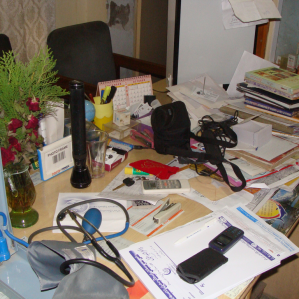

In [5]:
Image.open("./input/images/images/train/messy/73.png")


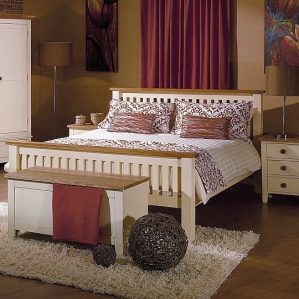

In [6]:
Image.open("./input/images/images/train/clean/73.png")


100%|██████████| 96/96 [00:00<00:00, 295.34it/s]


Text(0.5, 1.0, 'Messy and Clean Rooms in GrayScale')

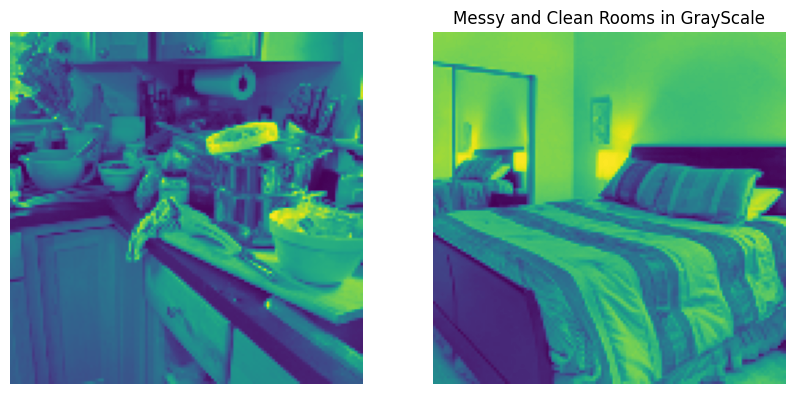

In [7]:
for image in tqdm(os.listdir(train_messy)): # برای هر تصویر در پوشه اتاق کثیف آموزشی
    path = os.path.join(train_messy, image) # مسیر کامل تصویر را می سازد
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) # تصویر را در مقیاس خاکستری می خواند
    img = cv2.resize(img, (image_size, image_size)).flatten() # اندازه تصویر را تغییر می دهد و آن را فلت می کند
    np_img=np.asarray(img)   # تصویر را به آرایه نامپای تبدیل می کند

for image2 in tqdm(os.listdir(train_clean)):
    path = os.path.join(train_clean, image2)
    img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.resize(img2, (image_size, image_size)).flatten()
    np_img2=np.asarray(img2)

# نمایش یک کثیف و یک تمیز
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(image_size, image_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size))
plt.axis('off')
plt.title("Messy and Clean Rooms in GrayScale")


In [8]:
def train_data():
    train_data_messy = []  # لیست خالی برای ذخیره تصاویر آموزشی کلاس اتاق شلوغ
    train_data_clean=[] # لیست خالی برای ذخیره تصاویر آموزشی کلاس اتاق تمیز

    for image1 in tqdm(os.listdir(train_messy)): # برای هر تصویر در پوشه train_messy
        path = os.path.join(train_messy, image1)  # مسیر کامل تصویر را می سازد
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # تصویر را در مقیاس خاکستری می خواند
        img1 = cv2.resize(img1, (image_size, image_size))  # اندازه تصویر را تغییر می دهد
        train_data_messy.append(img1) # تصویر را به لیست train_data_messy اضافه می کند
    for image2 in tqdm(os.listdir(train_clean)):
        path = os.path.join(train_clean, image)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_clean.append(img2)  # تصویر را به لیست train_data_clean اضافه می کند


    # تصاویر آموزشی هر دو کلاس را در یک آرایه نامپای ترکیب می کند
    train_data= np.concatenate((np.asarray(train_data_messy),np.asarray(train_data_clean)),axis=0)
    return train_data # آرایه ترکیب شده تصاویر آموزشی را برمی گرداند

In [9]:
def test_data():
    test_data_messy = []
    test_data_clean=[]

    for image1 in tqdm(os.listdir(test_messy)):
        path = os.path.join(test_messy, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img1 = cv2.resize(img1, (image_size, image_size))
        test_data_messy.append(img1)
    for image2 in tqdm(os.listdir(test_clean)):
        path = os.path.join(test_clean, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img2 = cv2.resize(img2, (image_size, image_size))
        test_data_clean.append(img2)

    test_data= np.concatenate((np.asarray(test_data_messy),np.asarray(test_data_clean)),axis=0)
    return test_data

In [10]:
train_data = train_data()
test_data = test_data()


100%|██████████| 10/10 [00:00<00:00, 199.56it/s]


In [12]:
# تصاویر آموزشی و تست را در یک آرایه ترکیب می کند
x_data=np.concatenate((train_data,test_data),axis=0)

# نرمالیزه کردن داده ها به بازه [0, 1]
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))


In [13]:
z1 = np.zeros(96)  # آرایه ای از 96 صفر
o1 = np.ones(96)  # آرایه ای از 96 یک
Y_train = np.concatenate((o1, z1), axis=0)
# برچسب های آموزشی را با ترکیب آرایه های o1 و z1 می سازد

z = np.zeros(10)  # آرایه ای از 10 صفر
o = np.ones(10)  # آرایه ای از 10 یک
Y_test = np.concatenate((o, z), axis=0)
# برچسب های تست را با ترکیب آرایه های o و z می سازد

In [14]:
y_data=np.concatenate((Y_train,Y_test),axis=0).reshape(x_data.shape[0],1)
# برچسب های آموزشی و تست را در یک آرایه ترکیب می کند و به شکل مناسب برای ورودی مدل درمی آورد

In [15]:
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)


X shape:  (212, 128, 128)
Y shape:  (212, 1)


In [16]:
from sklearn.model_selection import train_test_split

 # داده ها را به دو بخش آموزشی و تست تقسیم می کند
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)

# تعداد نمونه های آموزشی و تست را محاسبه می کند
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]


In [17]:
# تصاویر را به آرایه های یک بعدی تبدیل می کند
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2])

print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)


X train flatten (180, 16384)
X test flatten (32, 16384)


In [18]:
# آرایه های تصاویر و برچسب ها را ترانهاده می کند
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_test = y_test.T
y_train = y_train.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)


x train:  (16384, 180)
x test:  (16384, 32)
y train:  (1, 180)
y test:  (1, 32)


In [19]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1), 0.01)     # وزن ها را با مقادیر کوچک تصادفی (0.01) آغاز می کند
    b = 0.0     # بایاس (عرض از مبدا) را برابر 0 قرار می دهد
    return w, b

def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []

    for i in range(number_of_iterarion):

        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)

        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 100 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))

    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

def predict(w,b,x_test):

    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):

    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)

    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    print("Test Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100,2)))
    print("Train Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100,2)))


Cost after iteration 0: nan
Cost after iteration 100: 0.098827
Cost after iteration 200: 0.059664
Cost after iteration 300: 0.041903
Cost after iteration 400: 0.031769
Cost after iteration 500: 0.025337
Cost after iteration 600: 0.020958
Cost after iteration 700: 0.017813
Cost after iteration 800: 0.015459
Cost after iteration 900: 0.013636
Cost after iteration 1000: 0.012187
Cost after iteration 1100: 0.011010
Cost after iteration 1200: 0.010035
Cost after iteration 1300: 0.009215
Cost after iteration 1400: 0.008517


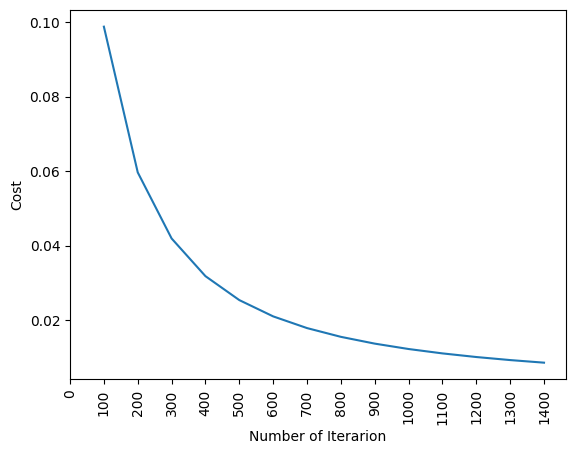

Test Accuracy: 87.5 %
Train Accuracy: 100.0 %


In [20]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 1500)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7),"penalty":["l1","l2"]},
logistic_regression=LogisticRegression(random_state=42)
log_reg_cv=GridSearchCV(logistic_regression,grid,cv=10)
log_reg_cv.fit(x_train.T,y_train.T)


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid=({'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l1', 'l2']},))

In [22]:
print("best hyperparameters: ", log_reg_cv.best_params_)
print("accuracy: ", log_reg_cv.best_score_)


best hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
accuracy:  0.961111111111111


In [23]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=1, penalty="l1", solver='liblinear')  # Use 'liblinear' solver for L1 penalty
log_reg.fit(x_train.T, y_train.T)
print("test accuracy: {}".format(log_reg.score(x_test.T, y_test.T)))
print("train accuracy: {}".format(log_reg.score(x_train.T, y_train.T)))


test accuracy: 0.90625
train accuracy: 0.9833333333333333
